In [2]:
#!/usr/bin/env python
import string
import hashlib
import sys
import re
import numpy as np
from scipy import stats
"""
# -----------------------------------------------------------------------------
# this is the hive entry point:
# parameters are accepted as a tab delimited stream
# the stream must be read and broken
# variables will be assigned to the 'parameters' passed
# as a reference
# PARAMETERS EXPEXTED:
#
# -----------------------------------------------------------------------------
# 
"""
# -----------------------------------------------------------------------------
#
#  GOOD WORDS LIST
# list_values2 = "dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.google.com.goal.com/en-gb/live-scores.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels"
# list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
#
# BAD WORDS LIST
# list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"   
#
#
# BAD DOMAINS LIST
# list_values3 = "27media.urlvalidation.apps6746.ittprize57.life.amatorskihokej.gilbertargentina.ar.coinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
#
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL size function1.
def func_url_lengh(var1):
    return len(var1)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
### Every URL with More than 80 chars, will be massive .
## URL isbig=1/0 function2.
def func_url_big(var1):
    if (len(var1) > 80):
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL number of '@' chars function3.
def func_url_count_at(var1):
    return var1.count('@')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL punctuation count function4.
def func_url_count_dot(var1):
    return var1.count('.')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL isipyn=1/0 function5.
## Search if matches pattern : "http://xx.xx.xx.xx/anythingnonspace7662u.wkjw3932"
def func_url_is_ip(var1):
    cleanvar=var1.strip('http://').strip('https://')
    m1 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))',cleanvar)
    m2 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)',cleanvar)
    m3 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)([\S]+)',cleanvar)
   
    if (m1 or m2 or m3):
        return 1
    else:
        return 0    
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function6.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# KL : Kullback-Leibler Divergence
# KS : Kolmogorov-Smirnov ( Sample sizes can be different)
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function7.
def func_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    print(list_values1,list_values2)
    print(values1,values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function8.
def func_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    # Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function9.
def func_bad_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function10.
def func_bad_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function11.
def func_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function12.
def func_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function13.
def func_bad_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 0 # if "=0" it Make sure URL/IP digits are not-bad/good phishing but problem google.com dazn.com
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function14.
def func_bad_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD words in URL based in our Internal Phishing function15.
def func_bad_words_domain(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.').split("/")[0]
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values3 = "27media.urlvalidation.apps6746.ittprize57.life.amatorskihokej.gilbertargentina.ar.coinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis ignore web domain and focus on typical pyshing/malware site names.
    to_clear=cleanvar.split(".")[0]+"."
    #print("to_clear="+to_clear)
    if list_values3.find(to_clear) == -1:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO English URL function16.
def func_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO phishing URL function17.
def func_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com" 
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO English URL function18.
def func_bad_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO phishing URL function19.
def func_bad_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com" 
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Languages eng ynverified=0 else =1
def func_url_lang_en_ynverified(var1):
    # https://commoncrawl.github.io/cc-crawl-statistics/plots/languages
    catalogue_valid_langs = ("eng","rus","jpn","deu","fra","zho","spa","por","ita","pol","nld","ces","tur","vie","ind","swe",\
                       "ara","fas","kor","ron","hun","ell","dan","ukr","fin","tha","nor","bul","slk","cat","heb","srp",\
                       "hrv","lit","msa","est","slv","lav","hin","ben","aze","lat","isl","tam","sqi","bos","kat","hye",\
                       "glg","urd","eus","mkd","kaz","mal","nno","mon","bel","nep","uzb","tel","mya","tgl","afr","mar",\
                       "swa","cym","kan","sin","guj","khm","tat","som","epo","kur","gle","kir","pan","fao","oci","tgk",\
                       "pus","amh","fry","ltz","mlg","war","lao","mlt","kin","ori","san","hau","gla","bre","cos","roh",\
                       "bak","hat","jav","yid","bod","ceb","grn","uig","sco","tuk","blu","div","ina","kal","tir","bih",\
                       "mri","nya","snd","sun","vol","asm","zul","glv","ile","orm","que","smo","sna","syr","xho","yor",\
                       "aar","abk","haw","ibo","kha","lin","sot","iku","lug","nso","run","tsn")
    catalogue_invalid_langs = ("<unknown>","unknown","<other>","other","")
    if var1==None:
        return 1
    elif (var1[:3].lower().startswith(catalogue_valid_langs)):
        return 0
    elif (var1[:3].lower().startswith(catalogue_invalid_langs)):
        return 1
    else:
        return 0
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
while True:
    line = sys.stdin.readline()
    if not line:
        break
    line = string.strip(line, "\n ")
    clienturls = string.split(line, "\t")
    clienturl = clienturls[0]
    url_lengh=func_url_lengh(clienturl)
    massiveurl=func_url_big(clienturl)
    count_at=func_url_count_at(clienturl)
    count_dot=func_url_count_dot(clienturl)
    url_is_ip=func_url_is_ip(clienturl)
    url_kl_en=func_kl_en_url(clienturl)
    count_dot_com=func_count_dot_com(clienturl)
    url_ks_en=func_ks_en_url(clienturl)
    print ("\t".join([ url_lengh, massiveurl, count_at, count_dot, url_is_ip, url_kl_en, count_dot_com,url_ks_en ]))
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# TEST FUNCTIONS5
print("F5")
print(func_url_is_ip("www.google.com"))
print(func_url_is_ip("35.190.74.53"))
print(func_url_is_ip("www.10.112.41.21.com/bug.html"))
#
# TEST FUNCTIONS7
print("F7")
print(func_kl_en_url("www.google.com"))
print(func_kl_en_url("www.10.112.41.21.com/bug.html"))
print(func_kl_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_kl_en_url("sc.iasds01.com/dtc"))
print(func_kl_en_url("apps6746.ittprize57.life"))
print(func_kl_en_url("urlvalidation.com"))
print(func_kl_en_url("27media.ro"))
print(func_kl_en_url("dazn.com"))
print(func_kl_en_url("www.performgroup.com"))
print(func_kl_en_url("www.goal.com/en-gb/live-scores"))

# TEST FUNCTIONS9
print("F9")
print(func_bad_kl_en_url("www.google.com"))
print(func_bad_kl_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_kl_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_kl_en_url("sc.iasds01.com/dtc"))
print(func_bad_kl_en_url("apps6746.ittprize57.life"))
print(func_bad_kl_en_url("urlvalidation.com"))
print(func_bad_kl_en_url("27media.ro"))
print(func_bad_kl_en_url("dazn.com"))
# TEST FUNCTIONS8
print("F8")
print(func_ks_en_url("www.google.com"))
print(func_ks_en_url("www.10.112.41.21.com/bug.html"))
print(func_ks_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_ks_en_url("sc.iasds01.com/dtc"))
print(func_ks_en_url("apps6746.ittprize57.life"))
print(func_ks_en_url("urlvalidation.com"))
print(func_ks_en_url("27media.ro"))
print(func_ks_en_url("dazn.com"))
# TEST FUNCTIONS10
print("F10")
print(func_bad_ks_en_url("www.google.com"))
print(func_bad_ks_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_ks_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_ks_en_url("sc.iasds01.com/dtc"))
print(func_bad_ks_en_url("apps6746.ittprize57.life"))
print(func_bad_ks_en_url("urlvalidation.com"))
print(func_bad_ks_en_url("27media.ro"))
print(func_bad_ks_en_url("dazn.com"))
#
# TEST FUNCTIONS11
print("F11")
print(func_kl_phish_url("www.google.com"))
print(func_kl_phish_url("www.10.112.41.21.com/bug.html"))
print(func_kl_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_kl_phish_url("sc.iasds01.com/dtc"))
print(func_kl_phish_url("www.dazn.com/en-DE"))
print(func_kl_phish_url("apps6746.ittprize57.life"))
print(func_kl_phish_url("urlvalidation.com"))
print(func_kl_phish_url("27media.ro"))
print(func_kl_phish_url("dazn.com"))
# TEST FUNCTIONS13
print("F13")
print(func_bad_kl_phish_url("www.google.com"))
print(func_bad_kl_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_kl_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_kl_phish_url("sc.iasds01.com/dtc"))
print(func_bad_kl_phish_url("www.dazn.com/en-DE"))
print(func_bad_kl_phish_url("apps6746.ittprize57.life"))
print(func_bad_kl_phish_url("urlvalidation.com"))
print(func_bad_kl_phish_url("27media.ro"))
print(func_bad_kl_phish_url("dazn.com"))
# TEST FUNCTIONS12
print("F12")
print(func_ks_phish_url("www.google.com"))
print(func_ks_phish_url("www.10.112.41.21.com/bug.html"))
print(func_ks_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_ks_phish_url("sc.iasds01.com/dtc"))
print(func_ks_phish_url("apps6746.ittprize57.life"))
print(func_ks_phish_url("urlvalidation.com"))
print(func_ks_phish_url("27media.ro"))
print(func_ks_phish_url("dazn.com"))
# TEST FUNCTIONS14
print("F14")
print(func_bad_ks_phish_url("www.google.com"))
print(func_bad_ks_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_ks_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_ks_phish_url("sc.iasds01.com/dtc"))
print(func_bad_ks_phish_url("apps6746.ittprize57.life"))
print(func_bad_ks_phish_url("urlvalidation.com"))
print(func_bad_ks_phish_url("27media.ro"))
print(func_bad_ks_phish_url("dazn.com"))
# TEST FUNCTIONS15
print("F15")
print(func_bad_words_domain("www.google.com"))
print(func_bad_words_domain("www.10.112.41.21.com/bug.html"))
print(func_bad_words_domain("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_words_domain("sc.iasds01.com/dtc"))
print(func_bad_words_domain("apps6746.ittprize57.life"))
print(func_bad_words_domain("urlvalidation.com"))
print(func_bad_words_domain("27media.ro"))
print(func_bad_words_domain("dazn.com"))
#
print("F16")
print(func_entropy_en_url("www.google.com"))
print(func_entropy_en_url("www.10.112.41.21.com/bug.html"))
print(func_entropy_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_entropy_en_url("sc.iasds01.com/dtc"))
print(func_entropy_en_url("apps6746.ittprize57.life"))
print(func_entropy_en_url("urlvalidation.com"))
print(func_entropy_en_url("27media.ro"))
print(func_entropy_en_url("dazn.com"))
#
print("F18")
print(func_bad_entropy_en_url("www.google.com"))
print(func_bad_entropy_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_entropy_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_entropy_en_url("sc.iasds01.com/dtc"))
print(func_bad_entropy_en_url("apps6746.ittprize57.life"))
print(func_bad_entropy_en_url("urlvalidation.com"))
print(func_bad_entropy_en_url("27media.ro"))
print(func_bad_entropy_en_url("dazn.com"))
#
print("F17")
print(func_entropy_phish_url("www.google.com"))
print(func_entropy_phish_url("www.10.112.41.21.com/bug.html"))
print(func_entropy_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_entropy_phish_url("sc.iasds01.com/dtc"))
print(func_entropy_phish_url("apps6746.ittprize57.life"))
print(func_entropy_phish_url("urlvalidation.com"))
print(func_entropy_phish_url("27media.ro"))
print(func_entropy_phish_url("dazn.com/en-DE"))
#
#
print("F19")
print(func_bad_entropy_phish_url("www.google.com"))
print(func_bad_entropy_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_entropy_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_entropy_phish_url("sc.iasds01.com/dtc"))
print(func_bad_entropy_phish_url("apps6746.ittprize57.life"))
print(func_bad_entropy_phish_url("urlvalidation.com"))
print(func_bad_entropy_phish_url("27media.ro"))
print(func_bad_entropy_phish_url("dazn.com/en-DE"))
#

F5
0
1
1
F7
['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm'] ['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm']
[103 111 111 103 108 101  46  99 111 109] [103 111 111 103 108 101  46  99 111 109]
0.0
['1', '0', '.', '1', '1', '2', '.', '4', '1', '.', '2', '1', '.', 'c', 'o', 'm', '/', 'b', 'u', 'g', '.', 'h', 't', 'm', 'l'] ['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm', '.', 'd', 'a', 'z', 'n', '.', 'c', 'o', 'm', '.', 'l', 'i', 'v', 'e', 's']
[ 49  48  46  49  49  50  46  52  49  46  50  49  46  99 111 109  47  98
 117 103  46 104 116 109 108] [103 111 111 103 108 101  46  99 111 109  46 100  97 122 110  46  99 111
 109  46 108 105 118 101 115]
-328.04527262467434
['t', 'c', 'i', 'a', 'u', 't', 'o', '.', 'c', 'o', 'm', '/', 'j', 's', '/', 'p', 'r', 'o', 't', 'o', 't', 'y', 'p', 'e', '/', 'p', 'r', 'o', 't', 'o', 't', 'y', 'p', 'e', '.', 'j'] ['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm', '.', 'd', 'a', 'z', 'n', '.', 'c', 'o', 'm', '.', 'l', 'i', 'v', 'e', 's', 'p', 'o', 'r'

In [3]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats

sc = pyspark.SparkContext(appName="phishingURL-Clean-AUTOML-V3-BestModel-Discovery")
sqlContext = SQLContext(sc)

import h2o
from h2o.automl import H2OAutoML

import subprocess
subprocess.run('unset http_proxy', shell=True)

h2o.init(ip="localhost",port=54321)
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL size function1.
def func_url_lengh(var1):
    return len(var1)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
### Every URL with More than 80 chars, will be massive .
## URL isbig=1/0 function2.
def func_url_big(var1):
    if (len(var1) > 80):
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL number of '@' chars function3.
def func_url_count_at(var1):
    return var1.count('@')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL punctuation count function4.
def func_url_count_dot(var1):
    return var1.count('.')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL isipyn=1/0 function5.
## Search if matches pattern : "http://xx.xx.xx.xx/anythingnonspace7662u.wkjw3932"
def func_url_is_ip(var1):
    cleanvar=var1.strip('http://').strip('https://')
    m1 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))',cleanvar)
    m2 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)',cleanvar)
    m3 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)([\S]+)',cleanvar)
   
    if (m1 or m2 or m3):
        return 1
    else:
        return 0    
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function6.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function6.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# KL : Kullback-Leibler Divergence
# KS : Kolmogorov-Smirnov ( Sample sizes can be different)
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function7.
def func_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function8.
def func_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    # Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function9.
def func_bad_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function10.
def func_bad_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------    
## URL KL from phishing URL  function11.
def func_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function12.
def func_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from Phishing URL function13.
def func_bad_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 0 # if "=0" it Make sure URL/IP digits are not-bad/good phishing but problem google.com dazn.com
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function14.
def func_bad_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD words in URL based in our Internal Phishing function15.
def func_bad_words_domain(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.').split("/")[0]
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values3 = "27media.urlvalidation.apps6746.ittprize57.life.amatorskihokej.gilbertargentina.ar.coinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis ignore web domain and focus on typical pyshing/malware site names.
    to_clear=cleanvar.split(".")[0]+"."
    #print("to_clear="+to_clear)
    if list_values3.find(to_clear) == -1:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO English URL function16.
def func_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO phishing URL function17.
def func_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO English URL function18.
def func_bad_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO phishing URL function19.
def func_bad_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com" 
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# # BUG      : https://issues.apache.org/jira/browse/SPARK-12157
# # Solution : https://stackoverflow.com/questions/9452775/converting-numpy-dtypes-to-native-python-types/11389998
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Transformation DI ynverified=1/0 FROM yes/no
def func_url_verified(var1):
    if var1==None:
        return 1
    if ( var1.lower()=='yes'):
        return 1
    elif (var1.lower()=='no'):
        return 0
    else :
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Languages eng ynverified=0 else =1
def func_url_lang_en_ynverified(var1):
    # https://commoncrawl.github.io/cc-crawl-statistics/plots/languages
    catalogue_valid_langs = ("eng","rus","jpn","deu","fra","zho","spa","por","ita","pol","nld","ces","tur","vie","ind","swe",\
                       "ara","fas","kor","ron","hun","ell","dan","ukr","fin","tha","nor","bul","slk","cat","heb","srp",\
                       "hrv","lit","msa","est","slv","lav","hin","ben","aze","lat","isl","tam","sqi","bos","kat","hye",\
                       "glg","urd","eus","mkd","kaz","mal","nno","mon","bel","nep","uzb","tel","mya","tgl","afr","mar",\
                       "swa","cym","kan","sin","guj","khm","tat","som","epo","kur","gle","kir","pan","fao","oci","tgk",\
                       "pus","amh","fry","ltz","mlg","war","lao","mlt","kin","ori","san","hau","gla","bre","cos","roh",\
                       "bak","hat","jav","yid","bod","ceb","grn","uig","sco","tuk","blu","div","ina","kal","tir","bih",\
                       "mri","nya","snd","sun","vol","asm","zul","glv","ile","orm","que","smo","sna","syr","xho","yor",\
                       "aar","abk","haw","ibo","kha","lin","sot","iku","lug","nso","run","tsn")
    catalogue_invalid_langs = ("<unknown>","unknown","<other>","other","")
    if var1==None:
        return 1
    elif (var1[:3].lower().startswith(catalogue_valid_langs)):
        return 0
    elif (var1[:3].lower().startswith(catalogue_invalid_langs)):
        return 1
    else:
        return 0
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
#
# UDF Functional DI Converstions 
func_url_verified_udf = udf(func_url_verified, IntegerType())
#
## NOT REQUIRED CONFUSES MODEL !!
### func_url_lang_en_ynverified_udf = udf(func_url_lang_en_ynverified, IntegerType())
#
# UDF COEFICIENT FUNCTIONS : [1-19] 
func_url_lengh_udf = udf(func_url_lengh, IntegerType())
func_url_big_udf = udf(func_url_big, IntegerType())
func_url_count_at_udf = udf(func_url_count_at, IntegerType())
func_url_count_dot_udf = udf(func_url_count_dot, IntegerType())
func_url_is_ip_udf = udf(func_url_is_ip, IntegerType())
func_count_dot_com_udf = udf(func_count_dot_com, IntegerType())
func_kl_en_url_udf = udf(func_kl_en_url, FloatType())
func_ks_en_url_udf = udf(func_ks_en_url, FloatType())
func_bad_kl_en_url_udf = udf(func_bad_kl_en_url, IntegerType())
func_bad_ks_en_url_udf = udf(func_bad_ks_en_url, IntegerType())
func_kl_phish_url_udf = udf(func_kl_phish_url, FloatType())
func_ks_phish_url_udf = udf(func_ks_phish_url, FloatType())
func_bad_kl_phish_url_udf = udf(func_bad_kl_phish_url, IntegerType())
func_bad_ks_phish_url_udf = udf(func_bad_ks_phish_url, IntegerType())
func_bad_words_domain_udf = udf(func_bad_words_domain, IntegerType())
func_entropy_en_url_udf = udf(func_entropy_en_url, FloatType())
func_entropy_phish_url_udf = udf(func_entropy_phish_url,FloatType())
func_bad_entropy_en_url_udf = udf(func_bad_entropy_en_url,IntegerType())
func_bad_entropy_phish_url_udf = udf(func_bad_entropy_phish_url,IntegerType())
#
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# Arguments
#
process_date="20181112"
ccrwal_raw_file="hdfs:///user/siemanalyst/data/raw/commoncrawl/dt="+process_date+"/clean-CC-MAIN-2018-43-index-.*.json"
phishtank_raw_file="hdfs:///user/siemanalyst/data/raw/phishtank/dt="+process_date+"/*.json"
#
ccrawl_staged_file="hdfs:///user/siemanalyst/data/staged/commoncrawl/dt="+process_date+"/"
phishtank_staged_file="hdfs:///user/siemanalyst/data/staged/phishtank/dt="+process_date+"/"
#
internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=*/*.json"
#internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=20181116/*.json"
#
#
## Get all URL Commom Crawl from
## List of Top Level Domains : *.com *.org *.co.uk *.ru *.net *.cn *.cz *.kp *.us "
# 
ccrawl_traindf = sqlContext.read.json(ccrwal_raw_file)
ccrawl_traindf.printSchema()
#
#### MODEL1 MODEL3 CCRAWL HAS NOT PHISHING URL
#.withColumn('ynverified',lit(0).cast('int'))\

## NOT REQUIRED CONFUSES MODEL !!
### 
#### MODEL 2
#.withColumn('ynverified',func_url_lang_en_ynverified_udf(ccrawl_traindf['languages']).cast('int') )\

drop_ccrawl_cols=['charset','digest','filename','verification_time','length','mime','mime-detected','offset','status']
## Assume URLS as not phishing ynverified=0 if EN as phishing ynverified=1
ccrawl_trainds = ccrawl_traindf\
.filter("url is not NULL")\
.drop(*drop_ccrawl_cols)\
.withColumn('ynverified',lit(0).cast('int'))\
.drop('languages')\
.withColumn('url_length',func_url_lengh_udf(col('url')).cast('int'))\
.withColumn('massiveurl',func_url_big_udf(col('url')).cast('int'))\
.withColumn('count_at',func_url_count_at_udf(col('url')).cast('int'))\
.withColumn('count_dot',func_url_count_dot_udf(col('url')).cast('int'))\
.withColumn('url_is_ip',func_url_is_ip_udf(col('url')).cast('int'))\
.withColumn('count_dot_com',func_count_dot_com_udf(col('url')).cast('int'))\
.withColumn('url_kl_en',func_kl_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_en',func_bad_kl_en_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_en',func_ks_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_en',func_bad_ks_en_url_udf(col('url')).cast('int'))\
.withColumn('url_kl_phish',func_kl_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_phish',func_bad_kl_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_phish',func_ks_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_phish',func_bad_ks_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_bad_words_domain',func_bad_words_domain_udf(col('url')).cast('int'))\
.withColumn('url_entropy_en',func_entropy_en_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_en',func_bad_entropy_en_url_udf(col('url')).cast('int'))\
.withColumn('url_entropy_phish',func_entropy_phish_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_phish',func_bad_entropy_phish_url_udf(col('url')).cast('int'))
#
ccrawl_trainds.printSchema()
ccrawl_persist=ccrawl_trainds.coalesce(1).write.json(ccrawl_staged_file , mode="overwrite")
#
phishtank_traindf= sqlContext.read.json(phishtank_raw_file)
phishtank_traindf.printSchema()
#
drop_phish_cols=['details','online','phish_detail_url','phish_id','submission_time','target','verification_time']
#
phishtank_trainds=phishtank_traindf\
.filter("url is not NULL")\
.drop(*drop_phish_cols)\
.withColumn('ynverified',func_url_verified_udf(col('verified')).cast('int'))\
.drop('verified')\
.withColumn('url_length',func_url_lengh_udf(col('url')).cast('int'))\
.withColumn('massiveurl',func_url_big_udf(col('url')).cast('int'))\
.withColumn('count_at',func_url_count_at_udf(col('url')).cast('int'))\
.withColumn('count_dot',func_url_count_dot_udf(col('url')).cast('int'))\
.withColumn('url_is_ip',func_url_is_ip_udf(col('url')).cast('int'))\
.withColumn('count_dot_com',func_count_dot_com_udf(col('url')).cast('int'))\
.withColumn('url_kl_en',func_kl_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_en',func_bad_kl_en_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_en',func_ks_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_en',func_bad_ks_en_url_udf(col('url')).cast('int'))\
.withColumn('url_kl_phish',func_kl_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_phish',func_bad_kl_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_phish',func_ks_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_phish',func_bad_ks_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_bad_words_domain',func_bad_words_domain_udf(col('url')).cast('int'))\
.withColumn('url_entropy_en',func_entropy_en_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_en',func_bad_entropy_en_url_udf(col('url')).cast('int'))\
.withColumn('url_entropy_phish',func_entropy_phish_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_phish',func_bad_entropy_phish_url_udf(col('url')).cast('int'))
phishtank_trainds.printSchema()
#
phishtank_persist=phishtank_trainds.coalesce(1).write.json(phishtank_staged_file , mode="overwrite")
#
#
sc.stop()
#
print("Factor Calculation Done!")
#

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 14 mins
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_siemanalyst_5izu34
H2O cluster total nodes:,1
H2O cluster free memory:,4.853 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


root
 |-- charset: string (nullable = true)
 |-- digest: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- languages: string (nullable = true)
 |-- length: string (nullable = true)
 |-- mime: string (nullable = true)
 |-- mime-detected: string (nullable = true)
 |-- offset: string (nullable = true)
 |-- status: string (nullable = true)
 |-- url: string (nullable = true)

root
 |-- url: string (nullable = true)
 |-- ynverified: integer (nullable = false)
 |-- url_length: integer (nullable = true)
 |-- massiveurl: integer (nullable = true)
 |-- count_at: integer (nullable = true)
 |-- count_dot: integer (nullable = true)
 |-- url_is_ip: integer (nullable = true)
 |-- count_dot_com: integer (nullable = true)
 |-- url_kl_en: double (nullable = true)
 |-- url_bad_kl_en: integer (nullable = true)
 |-- url_ks_en: double (nullable = true)
 |-- url_bad_ks_en: integer (nullable = true)
 |-- url_kl_phish: double (nullable = true)
 |-- url_bad_kl_phish: integer (nullable = true

In [1]:
#
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
sc = pyspark.SparkContext(appName="Notebook-phishingURL-ModelBuild-AUTOML-V4-BestModel-Discovery")
sqlContext = SQLContext(sc)

import h2o
from h2o.automl import H2OAutoML

import subprocess
subprocess.run('unset http_proxy', shell=True)

h2o.init(ip="localhost",port=54321)
#
#
# Arguments
#
process_date="20181112"
#
ccrawl_staged_file="hdfs:///user/siemanalyst/data/staged/commoncrawl/dt="+process_date+"/*.json"
#
phishtank_staged_file="hdfs:///user/siemanalyst/data/staged/phishtank/dt="+process_date+"/*.json"
#
internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=*/*.json"
#internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=20181116/*.json"
#
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
urlpredict_internaldata_dfile=sqlContext.read.json(internal_staged_urlpredict_files)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL")\
.filter("url_entropy_en IS NOT NULL")\
.filter("url_bad_entropy_en IS NOT NULL")\
.filter("url_entropy_phish IS NOT NULL")\
.filter("url_bad_entropy_phish IS NOT NULL")\
.groupby(col('url')).agg( F.first(col('ynverified')).alias('ynverified'),\
     F.first(col('url_length')).alias('url_length'), F.first(col('massiveurl')).alias('massiveurl'),\
     F.first(col('count_at')).alias('count_at'), F.first(col('count_dot')).alias('count_dot'),\
     F.first(col('url_is_ip')).alias('url_is_ip'),F.first(col('count_dot_com')).alias('count_dot_com'),\
     F.first(col('url_kl_en')).alias('url_kl_en'), F.first(col('url_bad_kl_en')).alias('url_bad_kl_en'),\
     F.first(col('url_ks_en')).alias('url_ks_en'), F.first(col('url_bad_ks_en')).alias('url_bad_ks_en'),\
     F.first(col('url_kl_phish')).alias('url_kl_phish'),F.first(col('url_bad_kl_phish')).alias('url_bad_kl_phish'),\
     F.first(col('url_ks_phish')).alias('url_ks_phish'),F.first(col('url_bad_ks_phish')).alias('url_bad_ks_phish'),\
     F.first(col('url_bad_words_domain')).alias('url_bad_words_domain'),\
     F.first(col('url_entropy_en')).alias('url_entropy_en'),F.first(col('url_bad_entropy_en')).alias('url_bad_entropy_en'),\
     F.first(col('url_entropy_phish')).alias('url_entropy_phish'),F.first(col('url_bad_entropy_phish')).alias('url_bad_entropy_phish'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
urlpredict_internaldata_dfile.printSchema()
#
#
internal_phishing_malware_df=urlpredict_internaldata_dfile.\
select(col('url'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),\
       col('url_bad_words_domain').cast('int'),\
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
internal_phishing_malware_df.printSchema()
#
#
#https://deepsense.ai/optimize-spark-with-distribute-by-and-cluster-by/
ccrawl_staged=sqlContext.read.json(ccrawl_staged_file)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL")\
.filter("url_entropy_en IS NOT NULL")\
.filter("url_bad_entropy_en IS NOT NULL")\
.filter("url_entropy_phish IS NOT NULL")\
.filter("url_bad_entropy_phish IS NOT NULL").\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),\
       col('url_bad_words_domain').cast('int'),\
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
ccrawl_staged.printSchema()
#
#
#https://deepsense.ai/optimize-spark-with-distribute-by-and-cluster-by/
phishtank_staged=sqlContext.read.json(phishtank_staged_file)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL")\
.filter("url_entropy_en IS NOT NULL")\
.filter("url_bad_entropy_en IS NOT NULL")\
.filter("url_entropy_phish IS NOT NULL")\
.filter("url_bad_entropy_phish IS NOT NULL").\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),\
       col('url_bad_words_domain').cast('int'),\
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
phishtank_staged.printSchema()
#
#
phishtank_plus_urlpredict_internaldata=internal_phishing_malware_df.union(phishtank_staged).\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),
       col('url_bad_words_domain').cast('int'),
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
phishtank_plus_urlpredict_internaldata.printSchema()
#
#
phishtank_train_pd=phishtank_plus_urlpredict_internaldata.toPandas()
phishtank_test_pd=phishtank_plus_urlpredict_internaldata.toPandas().tail(5000)                                                                        
phishtank_train=h2o.H2OFrame(phishtank_train_pd)
phishtank_test=h2o.H2OFrame(phishtank_test_pd)
#
#
ccrawl_train_pd=ccrawl_staged.toPandas()  
ccrawl_test_pd=ccrawl_staged.toPandas().head(5000)
ccrawl_train_hf=h2o.H2OFrame(ccrawl_train_pd)
ccrawl_test_hf=h2o.H2OFrame(ccrawl_test_pd)
#
#
###### TRAINING PROCESS ############
# RBIND "Merge" all of 3 internal ccrawl and phishtank with rbind .
# function merge() doesn't work if both H2O/dataframes have same variables
#
train = ccrawl_train_hf.rbind(phishtank_train)
test = phishtank_test.rbind(ccrawl_test_hf)
#
#
print("train")
print(train.head(10))
print("test")
print(test.head(10))
#
#
# Identify predictors and response
x = train.columns
#
# test Learning is it a bit URL TRUE/FALSE
#y = 'massiveurl'
#
# Casual is it verified phishing from url characteristics TRUE/FALSE
y= 'ynverified'
x.remove(y)
#
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
#
# http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
# Balance Classes to compensate unbalanced data
# Run AutoML for 25 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=25, seed=19, exclude_algos=["DRF","GLM"])
aml.train(x=x, y=y, training_frame=train)
#
sc.stop()
#
print("Model Training Done!")
#

/opt/cloudera/parcels/Anaconda-5.1.0.1/lib/python3.6/site-packages/h2o/backend/connection.py:312: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  "This may interfere with your H2O Connection." % name)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /opt/cloudera/parcels/Anaconda-5.1.0.1/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvmilky48
  JVM stdout: /tmp/tmpvmilky48/h2o_siemanalyst_started_from_python.out
  JVM stderr: /tmp/tmpvmilky48/h2o_siemanalyst_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321...................... failed.


H2OConnectionError: Could not establish link to the H2O cloud http://127.0.0.1:54321 after 20 retries
[54:06.62] H2OServerError: HTTP 503 Service Unavailable:
[54:06.83] H2OServerError: HTTP 503 Service Unavailable:
[54:07.03] H2OServerError: HTTP 503 Service Unavailable:
[54:07.24] H2OServerError: HTTP 503 Service Unavailable:
[54:07.45] H2OServerError: HTTP 503 Service Unavailable:
[54:07.66] H2OServerError: HTTP 503 Service Unavailable:
[54:07.87] H2OServerError: HTTP 503 Service Unavailable:
[54:08.08] H2OServerError: HTTP 503 Service Unavailable:
[54:08.29] H2OServerError: HTTP 503 Service Unavailable:
[54:08.50] H2OServerError: HTTP 503 Service Unavailable:
[54:08.70] H2OServerError: HTTP 503 Service Unavailable:
[54:08.91] H2OServerError: HTTP 503 Service Unavailable:
[54:09.12] H2OServerError: HTTP 503 Service Unavailable:
[54:09.33] H2OServerError: HTTP 503 Service Unavailable:
[54:09.54] H2OServerError: HTTP 503 Service Unavailable:
[54:09.75] H2OServerError: HTTP 503 Service Unavailable:
[54:09.96] H2OServerError: HTTP 503 Service Unavailable:
[54:10.16] H2OServerError: HTTP 503 Service Unavailable:
[54:10.37] H2OServerError: HTTP 503 Service Unavailable:
[54:10.58] H2OServerError: HTTP 503 Service Unavailable:

In [3]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
DRF_1_AutoML_20181129_122302,0.985466,0.135569,0.0687435,0.199605,0.0398422
XGBoost_grid_1_AutoML_20181129_122302_model_1,0.985242,0.102948,0.0657165,0.167357,0.0280082
GBM_5_AutoML_20181129_122302,0.984264,0.11407,0.0685094,0.176286,0.0310766
GBM_4_AutoML_20181129_122302,0.984034,0.114473,0.0707306,0.176797,0.0312573
StackedEnsemble_BestOfFamily_AutoML_20181129_122302,0.983827,0.114645,0.0679752,0.17091,0.0292102
StackedEnsemble_AllModels_AutoML_20181129_122302,0.98365,0.114292,0.0669987,0.170913,0.0292114
XRT_1_AutoML_20181129_122302,0.982995,0.142758,0.0724121,0.204155,0.0416794
XGBoost_grid_1_AutoML_20181129_122302_model_2,0.982579,0.119167,0.0734026,0.176701,0.0312233
GBM_3_AutoML_20181129_122302,0.98243,0.117367,0.0763086,0.180291,0.0325049
XGBoost_2_AutoML_20181129_122302,0.982143,0.113593,0.0731573,0.176693,0.0312205


In [4]:
# The leader model is stored here
aml.leader


Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20181129_122302


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.020810054446603103
RMSE: 0.14425690432905838
LogLoss: 0.08039383839393835
Mean Per-Class Error: 0.013465272225235969
AUC: 0.9987648251999065
pr_auc: 0.6906496824142876
Gini: 0.997529650399813
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23392388515759507: 


,0,1,Error,Rate
0,97623.0,1596.0,0.0161,(1596.0/99219.0)
1,1076.0,98141.0,0.0108,(1076.0/99217.0)
Total,98699.0,99737.0,0.0135,(2672.0/198436.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2339239,0.9865698,279.0
max f2,0.1402127,0.9908196,306.0
max f0point5,0.3740897,0.9880654,242.0
max accuracy,0.2339239,0.9865347,279.0
max precision,0.9973549,0.9994838,4.0
max recall,0.0193870,1.0,371.0
max specificity,0.9999932,0.9998387,0.0
max absolute_mcc,0.2339239,0.9730828,279.0
max min_per_class_accuracy,0.2622500,0.9863232,271.0
max mean_per_class_accuracy,0.2339239,0.9865347,279.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 46.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1495696,1.0,1.9991441,1.9991441,0.9995620,1.0,0.9995620,1.0,0.2990113,0.2990113,99.9144138,99.9144138
,2,0.1501340,0.9998717,2.0000202,1.9991474,1.0,0.9998795,0.9995636,0.9999995,0.0011288,0.3001401,100.0020158,99.9147432
,3,0.2000040,0.9961510,1.9975949,1.9987603,0.9987874,0.9985396,0.9993701,0.9996355,0.0996200,0.3997601,99.7594911,99.8760318
,4,0.3000413,0.9631860,1.9967961,1.9981054,0.9983880,0.9835415,0.9990426,0.9942696,0.1997541,0.5995142,99.6796106,99.8105427
,5,0.4000030,0.8386830,1.9964912,1.9977020,0.9982355,0.9117889,0.9988409,0.9736575,0.1995727,0.7990869,99.6491185,99.7702024
,6,0.5,0.2620813,1.8723164,1.9726257,0.9361488,0.6493275,0.9863029,0.9087934,0.1872260,0.9863128,87.2316406,97.2625659
,7,0.6000020,0.0178840,0.1365666,1.6666107,0.0682826,0.0672904,0.8332969,0.7685406,0.0136569,0.9999698,-86.3433415,66.6610673
,8,0.6999990,0.0054207,0.0003024,1.4285735,0.0001512,0.0102912,0.7142795,0.6602223,0.0000302,1.0,-99.9697623,42.8573485
,9,0.8000010,0.0019784,0.0,1.2499984,0.0,0.0035429,0.6249929,0.5781359,0.0,1.0,-100.0,24.9998425
,10,0.8999980,0.0004409,0.0,1.1111136,0.0,0.0011062,0.5555512,0.5140233,0.0,1.0,-100.0,11.1113600




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.04022427228871795
RMSE: 0.20055989701013996
LogLoss: 0.1375622890815294
Mean Per-Class Error: 0.056973991993269135
AUC: 0.9833015834686578
pr_auc: 0.851090120228969
Gini: 0.9666031669373156
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14688831289754156: 


,0,1,Error,Rate
0,10771.0,296.0,0.0267,(296.0/11067.0)
1,230.0,2096.0,0.0989,(230.0/2326.0)
Total,11001.0,2392.0,0.0393,(526.0/13393.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1468883,0.8885121,273.0
max f2,0.0997634,0.9048656,297.0
max f0point5,0.3712226,0.9090909,200.0
max accuracy,0.2099419,0.9613231,250.0
max precision,0.9999863,1.0,0.0
max recall,0.0003241,1.0,398.0
max specificity,0.9999863,1.0,0.0
max absolute_mcc,0.1468883,0.8648070,273.0
max min_per_class_accuracy,0.0743304,0.9398108,312.0
max mean_per_class_accuracy,0.0997634,0.9430260,297.0


Gains/Lift Table: Avg response rate: 17.37 %, avg score: 13.45 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0153065,1.0,5.7579536,5.7579536,1.0,1.0,1.0,1.0,0.0881341,0.0881341,475.7953568,475.7953568
,2,0.0200851,0.9996053,5.7579536,5.7579536,1.0,0.9997688,1.0,0.9999450,0.0275150,0.1156492,475.7953568,475.7953568
,3,0.0300157,0.9969065,5.7146607,5.7436303,0.9924812,0.9987044,0.9975124,0.9995345,0.0567498,0.1723990,471.4660684,474.3630301
,4,0.0400209,0.9881192,5.7149838,5.7364687,0.9925373,0.9933880,0.9962687,0.9979979,0.0571797,0.2295787,471.4983766,473.6468667
,5,0.0503248,0.9427340,5.7162293,5.7323247,0.9927536,0.9672176,0.9955490,0.9916957,0.0588994,0.2884781,471.6229267,473.2324695
,6,0.1000523,0.7044765,5.6196244,5.6763109,0.9759760,0.8408656,0.9858209,0.9167309,0.2794497,0.5679278,461.9624354,467.6310943
,7,0.1500037,0.3170031,4.7509572,5.3681668,0.8251121,0.5136591,0.9323046,0.7825074,0.2373173,0.8052451,375.0957204,436.8166766
,8,0.2000299,0.0941355,2.5180304,4.6553667,0.4373134,0.1765473,0.8085106,0.6309608,0.1259673,0.9312124,151.8030441,365.5366715
,9,0.3000075,0.0240453,0.4386193,3.2501341,0.0761763,0.0470302,0.5644599,0.4363657,0.0438521,0.9750645,-56.1380684,225.0134070
,10,0.3999851,0.0111584,0.1376061,2.4721473,0.0238984,0.0164035,0.4293448,0.3313948,0.0137575,0.9888220,-86.2393940,147.2147323




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.03984215025577101
RMSE: 0.19960498554838507
LogLoss: 0.13556886002017493
Mean Per-Class Error: 0.056612340530455385
AUC: 0.9854659829950296
pr_auc: 0.836691625941319
Gini: 0.9709319659900593
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17429041817790425: 


,0,1,Error,Rate
0,97092.0,2127.0,0.0214,(2127.0/99219.0)
1,2410.0,18357.0,0.116,(2410.0/20767.0)
Total,99502.0,20484.0,0.0378,(4537.0/119986.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1742904,0.8900148,270.0
max f2,0.0860117,0.9050303,312.0
max f0point5,0.3463663,0.9159744,213.0
max accuracy,0.2064900,0.9625373,258.0
max precision,0.9999457,0.9995871,0.0
max recall,0.0006962,1.0,397.0
max specificity,0.9999457,0.9999899,0.0
max absolute_mcc,0.1828714,0.8674096,266.0
max min_per_class_accuracy,0.0734293,0.9419668,318.0
max mean_per_class_accuracy,0.0860117,0.9433877,312.0


Gains/Lift Table: Avg response rate: 17.31 %, avg score: 13.22 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0164686,1.0,5.7748003,5.7748003,0.9994939,1.0,0.9994939,1.0,0.0951028,0.0951028,477.4800325,477.4800325
,2,0.0200023,0.9994222,5.7777243,5.7753169,1.0,0.9997541,0.9995833,0.9999566,0.0204170,0.1155198,477.7724274,477.5316889
,3,0.0300035,0.9958166,5.7680947,5.7729095,0.9983333,0.9978951,0.9991667,0.9992694,0.0576877,0.1732075,476.8094734,477.2909504
,4,0.0400213,0.9783427,5.7248499,5.7608796,0.9908486,0.9900044,0.9970845,0.9969503,0.0573506,0.2305581,472.4849925,476.0879597
,5,0.0500058,0.9213875,5.7391418,5.7565393,0.9933222,0.9488794,0.9963333,0.9873521,0.0573025,0.2878605,473.9141808,475.6539285
,6,0.1000033,0.6973170,5.6582981,5.7074228,0.9793299,0.8312934,0.9878323,0.9093293,0.2829008,0.5707613,465.8298068,470.7422770
,7,0.1500008,0.2945238,4.9128474,5.4425790,0.8503084,0.4954108,0.9419936,0.7713641,0.2456301,0.8163914,391.2847395,444.2579028
,8,0.2000067,0.0895044,2.3207193,4.6620490,0.4016667,0.1685602,0.8069006,0.6206506,0.1160495,0.9324409,132.0719250,366.2049039
,9,0.3000017,0.0240097,0.4651843,3.2631719,0.0805134,0.0459416,0.5647850,0.4290916,0.0465161,0.9789570,-53.4815665,226.3171866
,10,0.4000050,0.0108523,0.1131565,2.4756516,0.0195850,0.0162115,0.4284821,0.3258694,0.0113160,0.9902730,-88.6843470,147.5651624



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9623706,0.0007677,0.9624969,0.9619536,0.9615369,0.9644122,0.9614535
auc,0.985482,0.0006682,0.9850643,0.9857230,0.9863192,0.9864388,0.9838645
err,0.0376294,0.0007677,0.0375031,0.0380464,0.0384631,0.0355878,0.0385465
err_count,903.0,18.422812,900.0,913.0,923.0,854.0,925.0
f0point5,0.8945109,0.0039247,0.9014921,0.8961103,0.8863084,0.8985283,0.8901157
f1,0.8904882,0.0022681,0.8892444,0.8885634,0.8895537,0.8968350,0.8882445
f2,0.8865640,0.0047712,0.8773251,0.8811426,0.8928228,0.8951480,0.8863811
lift_top_group,5.7744875,0.0044963,5.775692,5.7768416,5.7620473,5.7796245,5.7782326
logloss,0.1355688,0.0028833,0.1368600,0.1381678,0.1345548,0.1282338,0.1400279
max_per_class_error,0.1159991,0.0070122,0.1304452,0.1237362,0.1049844,0.1059730,0.1148567


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-11-29 12:24:13,1 min 10.955 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-11-29 12:24:14,1 min 11.499 sec,1.0,0.1896068,0.7859217,0.9750912,0.1069008,1.9129360,0.0353456,0.2571123,2.0071162,0.8833013,0.1249254,4.6219032,0.0680206
,2018-11-29 12:24:14,1 min 11.885 sec,2.0,0.1817059,0.6280805,0.9796149,0.1423850,1.9291647,0.0315549,0.2212589,0.7263372,0.9413146,0.2884120,5.3609837,0.0583140
,2018-11-29 12:24:14,1 min 12.139 sec,3.0,0.1788095,0.5219099,0.9827755,0.1597332,1.9412773,0.0297643,0.2141541,0.4808434,0.9533126,0.3695737,5.5383520,0.0510715
,2018-11-29 12:24:15,1 min 12.385 sec,4.0,0.1740330,0.4421553,0.9847133,0.2280469,1.9472267,0.0275641,0.2102342,0.3562782,0.9619180,0.5090518,5.5934406,0.0468155
,2018-11-29 12:24:15,1 min 12.648 sec,5.0,0.1688655,0.3652934,0.9873689,0.2428055,1.9570652,0.0255249,0.2073187,0.2940723,0.9677939,0.5454365,5.6244911,0.0448742
,2018-11-29 12:24:15,1 min 12.970 sec,6.0,0.1661428,0.3080317,0.9892929,0.2646598,1.9643630,0.0242978,0.2065505,0.2521899,0.9709662,0.5736547,5.6554989,0.0447995
,2018-11-29 12:24:16,1 min 13.291 sec,7.0,0.1634124,0.2662096,0.9907526,0.2815964,1.9699028,0.0232910,0.2058086,0.2279152,0.9745408,0.5999870,5.6483479,0.0443515
,2018-11-29 12:24:16,1 min 13.625 sec,8.0,0.1625186,0.2308573,0.9921456,0.3027713,1.9747851,0.0226937,0.2050889,0.2066323,0.9761192,0.6235480,5.6716627,0.0429329
,2018-11-29 12:24:16,1 min 13.975 sec,9.0,0.1590979,0.1968435,0.9934265,0.3182045,1.9795714,0.0216631,0.2047519,0.1923866,0.9770117,0.6412343,5.6998762,0.0425595


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
count_dot_com,427444.8125000,1.0,0.2605217
url_entropy_en,291143.7187500,0.6811259,0.1774481
url_length,194755.4531250,0.4556271,0.1187008
url_kl_phish,155700.3906250,0.3642585,0.0948973
url_kl_en,111650.9687500,0.2612056,0.0680497
url_entropy_phish,87311.5937500,0.2042640,0.0532152
url_ks_en,81841.4062500,0.1914666,0.0498812
url_ks_phish,78534.4062500,0.1837299,0.0478656
count_dot,75198.2812500,0.1759251,0.0458323
url_bad_kl_phish,45222.5898438,0.1057975,0.0275625


In [5]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

#preds = aml.predict(test)
# or:
preds = aml.leader.predict(test)
print("test")
print(test.head(10))
print("prediction")
print(preds.head(10))

drf prediction progress: |████████████████████████████████████████████████| 100%
test


url,ynverified,url_length,massiveurl,count_at,count_dot,url_is_ip,count_dot_com,url_kl_en,url_bad_kl_en,url_ks_en,url_bad_ks_en,url_kl_phish,url_bad_kl_phish,url_ks_phish,url_bad_ks_phish,url_bad_words_domain,url_entropy_en,url_bad_entropy_en,url_entropy_phish,url_bad_entropy_phish
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499/,1,61,0,0,1,0,1,-757.875,1,7.84305e-06,1,-244.177,0,0.00150733,1,0,0.0729392,0,0.123284,0
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499,1,60,0,0,1,0,1,-757.875,1,7.84305e-06,1,-244.177,0,0.00150733,1,0,0.0729392,0,0.123284,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=d3993414284beca7c9d20faab65c690f/,1,79,0,0,1,0,1,-568.747,1,0.000130907,1,-122.362,0,0.000278609,1,0,0.0728177,0,0.100008,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=300308dff2f464ff22433eb64d8eb61f/,1,79,0,0,1,0,1,-579.733,1,0.000130907,1,-227.502,0,0.000278609,1,0,0.0792611,0,0.0905584,0
http://www.miroslavopava.cz/media/system/js/validateotp.htm,1,59,0,0,3,0,0,408.304,1,0.945549,0,872.05,1,0.652101,0,0,0.0654741,0,0.097199,0
http://suelunn.com/aut.php?email=crl398@gmail.com,1,49,0,1,3,0,2,26.3968,0,0.738162,0,323.174,1,0.738162,0,0,0.0551491,0,0.0643832,0
http://metaswitchweightloss.com/alibaba/alibaba/,1,48,0,0,1,0,1,366.07,1,0.723665,0,667.595,1,0.361313,1,0,0.0663577,0,0.0697863,0
http://odbiorcy.emoda.nnn.vc/login.php,1,38,0,0,4,0,0,216.156,1,0.999998,0,293.179,1,0.993644,0,0,0.0862164,0,0.0917235,0
http://www.onefd.edu.dz.forexwinz.com/facebook/FR/login.php,1,59,0,0,6,0,1,291.321,1,0.777684,0,468.467,1,0.777684,0,0,0.0890603,0,0.0842165,0
http://tmsvent.ru/layouts/joomla/edit/js/1/,1,43,0,0,1,0,0,166.841,1,0.825316,0,323.869,1,0.621292,0,0,0.0661926,0,0.0801017,0



prediction


predict,p0,p1
1,0.111907,0.888093
1,0.111907,0.888093
1,5.64373e-05,0.999944
1,0.0573175,0.942683
1,0.0659871,0.934013
1,0.0901847,0.909815
1,0,1
1,0.0167576,0.983242
1,0.107051,0.892949
1,0.240179,0.759821


In [6]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

print(model_ids)
# Get the "All Models" Stacked Ensemble model
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

# Get the Stacked Ensemble metalearner model
#metalearner = h2o.get_model(aml.leader.metalearner()['name'])
#metalearner.coef_norm()

['DRF_1_AutoML_20181129_122302', 'XGBoost_grid_1_AutoML_20181129_122302_model_1', 'GBM_5_AutoML_20181129_122302', 'GBM_4_AutoML_20181129_122302', 'StackedEnsemble_BestOfFamily_AutoML_20181129_122302', 'StackedEnsemble_AllModels_AutoML_20181129_122302', 'XRT_1_AutoML_20181129_122302', 'XGBoost_grid_1_AutoML_20181129_122302_model_2', 'GBM_3_AutoML_20181129_122302', 'XGBoost_2_AutoML_20181129_122302', 'XGBoost_3_AutoML_20181129_122302', 'GBM_2_AutoML_20181129_122302', 'GBM_1_AutoML_20181129_122302', 'XGBoost_1_AutoML_20181129_122302', 'GBM_grid_1_AutoML_20181129_122302_model_1', 'GBM_grid_1_AutoML_20181129_122302_model_2', 'XGBoost_grid_1_AutoML_20181129_122302_model_5', 'XGBoost_grid_1_AutoML_20181129_122302_model_3', 'XGBoost_grid_1_AutoML_20181129_122302_model_4', 'GBM_grid_1_AutoML_20181129_122302_model_3', 'GLM_grid_1_AutoML_20181129_122302_model_1', 'DeepLearning_grid_1_AutoML_20181129_122302_model_1', 'DeepLearning_1_AutoML_20181129_122302']


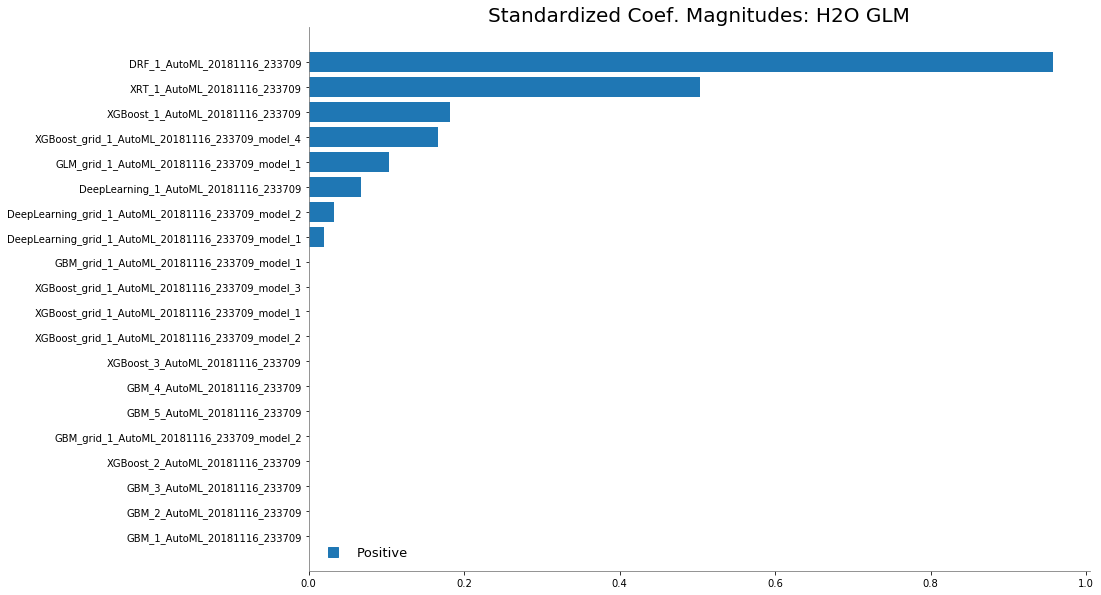

In [9]:
%matplotlib inline
metalearner.std_coef_plot()

In [7]:
aml.leader.download_mojo(path = "./product_model_bin/m25/v4/mojo", get_genmodel_jar = True)

'/home/siemanalyst/notebooks/siem/product_model_bin/m25/v4/mojo/DRF_1_AutoML_20181129_122302.zip'

In [ ]:
sc.stop()